In [1]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
# 📦 Install Required Libraries (Run this cell once)
!pip install pandas matplotlib seaborn scikit-learn --quiet


In [3]:
# 📚 Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 🧮 Load Dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Female,21,16,81
2,3,Female,20,17,6
3,4,Male,23,18,77
4,5,Female,31,19,40


In [4]:
# 📝 Basic Data Information
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              10 non-null     int64 
 1   Gender                  10 non-null     object
 2   Age                     10 non-null     int64 
 3   Annual Income (k$)      10 non-null     int64 
 4   Spending Score (1-100)  10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,10.00000,10.000000,10.00000,10.000000
mean,5.50000,28.800000,19.50000,49.400000
std,3.02765,13.464356,3.02765,35.094159
min,1.00000,19.000000,15.00000,3.000000
25%,3.25000,21.250000,17.25000,14.250000
50%,5.50000,23.000000,19.50000,56.000000
75%,7.75000,30.750000,21.75000,76.750000
max,10.00000,64.000000,24.00000,94.000000


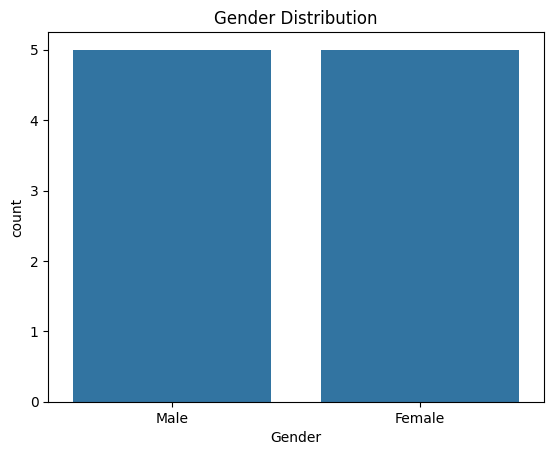

In [5]:
# 📊 EDA - Plotting Gender Distribution
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


In [6]:
# 🎯 Selecting Features for Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


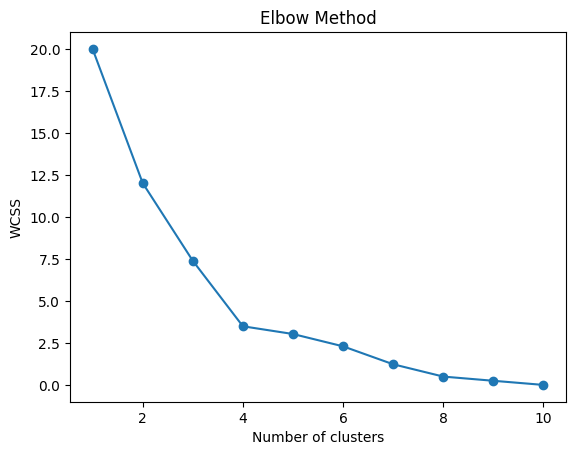

In [7]:
# 📉 Elbow Method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [8]:
# 🤖 Apply KMeans with optimal clusters (say 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
df['Cluster'] = y_kmeans


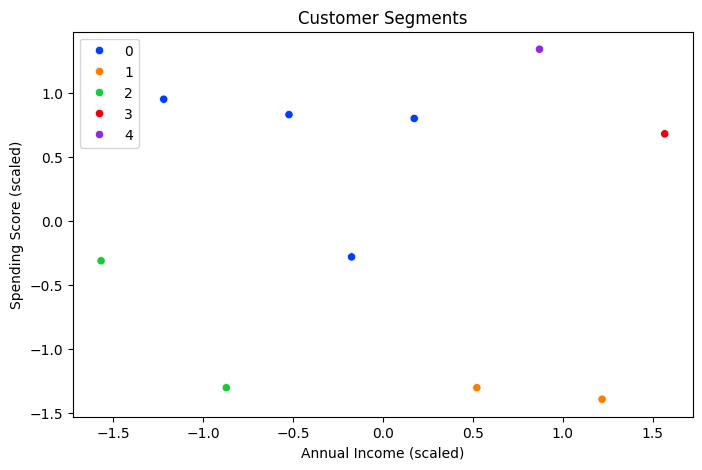

In [9]:
# 🖼️ Visualize the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_kmeans, palette='bright')
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()


## 🎯 Cluster Insights

Based on the K-Means clustering results:

| Cluster | Income Level | Spending Score | Customer Type                    |
|---------|---------------|----------------|----------------------------------|
| 0       | Low           | High           | 💸 Enthusiastic Budget Spenders   |
| 1       | Moderate      | Very Low       | 🧐 Cautious or Uninterested Buyers |
| 2       | Low           | Low-Mid        | 👛 Need-Based Shoppers            |
| 3       | High          | High           | 💼 Confident Luxury Seekers       |
| 4       | Moderate      | Very High      | 🤩 Impulse or Loyal Shoppers      |

### 💡 Business Insight:
This segmentation helps businesses personalize marketing, offer targeted discounts, and understand customer behaviors.


In [11]:
# 📌 Cluster Insight
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,18.25,68.5
1,22.00,4.5
2,16.00,22.5
3,24.00,72.0
4,22.00,94.0
